In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from importlib import resources
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture
#===========obs_data==============#
df1 = pd.read_csv('testdat.txt', sep='\s+', usecols=['cl_idn','sparsity','m12', 'doff','xi','fsub','kuiperV','asym']) 
df1['kuiperV']=abs(df1['kuiperV'])
features1 =['sparsity','m12', 'fsub', 'kuiperV', 'doff', 'asym']
features2=['S', "$\Delta M_{*, 12}$",   "$f_{M_*}$",'V', "$d_{off}$" ,r"$ \beta $" ]
obs = df1.loc[:, features1].values ; cl_idn = df1.loc[:,['cl_idn']].values 
scaler_obs = StandardScaler().fit(obs)
obs=scaler_obs.transform(obs) 

# bcgcd example

In [11]:
from bcdc3 import bcdc3
result=bcdc3(obs)
print(result.keys())
label=result['label']
print(label)

dict_keys(['label'])
[1. 2. 0. 0. 0.]


# bcgcd3proj example

In [12]:
from bcdc3 import bcdc3proj
numb=2; i=0;j=1;m=0;n=0;l=0;q=0 ; clid=cl_idn
result1=bcdc3proj(numb,i, j, m, n, l, q, obs, clid)
result1.keys()
result1['recent'], result1['ancient'],result1['relax']

(array([['A2111', 0.9109434087594281, 0.08905658701425721,
         4.226314601579065e-09]], dtype=object),
 array([['A76', 0.39772878322936356, 0.6022693768463101,
         1.8399243263408498e-06]], dtype=object),
 array([['RXJ1720', 0.09826987794466699, 0.09042107736543195,
         0.811309044689901],
        ['Zw1478', 0.17977399365754027, 0.12903574125614245,
         0.6911902650863172],
        ['RXCJ1210.3+0523', 0.29952301630320943, 0.18780631926908556,
         0.512670664427705]], dtype=object))

# contour plot

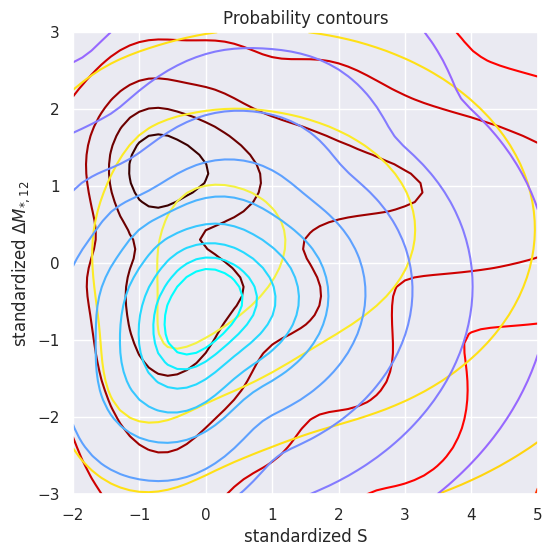

In [13]:
#-------read pickle data --------
with resources.files("bcdc").joinpath("bgm_m_object.pickle").open("rb") as f:
    bgm_m = pickle.load(f)
covariances=bgm_m.covariances_ ; mean_values=bgm_m.means_ ; a=bgm_m.weights_ 
sorted_index=np.where(a > 1./100)[0] ; numb_of_gaussian=np.shape(sorted_index)[0]
with resources.files("bcdc").joinpath("bgm_a_object.pickle").open("rb") as f:
    bgm_a = pickle.load(f)
with resources.files("bcdc").joinpath("bgm_c_object.pickle").open("rb") as f:
    bgm_c = pickle.load(f)
covariances1=bgm_c.covariances_ ; mean_values1=bgm_c.means_ ; a1=bgm_c.weights_
sorted_index1=np.where(a1 > 1./50)[0] ; numb_of_gaussian1=np.shape(sorted_index1)[0]
#-----------------------------------

minrange=[-2,-3]
maxrange=[5,3]
i=0 ; j=1

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot()
gm = GaussianMixture(n_components=100, random_state=0, verbose=2)
means=[] ; Cov=[] ; val=[]
for k in range(numb_of_gaussian):
    #print(sorted_index[k])
    means.append(bgm_m.means_[sorted_index[k],[i,j]])

    a = np.zeros(4).reshape(2,2)
    a[0,0] = bgm_m.covariances_[sorted_index[k],i,i]
    a[0,1] = bgm_m.covariances_[sorted_index[k],i,j]

    a[1,1] = bgm_m.covariances_[sorted_index[k],j,j]
    a[1,0] = bgm_m.covariances_[sorted_index[k],j,i]
    Cov.append(a)

M=np.asarray(means)
C=np.asarray(Cov)
if (i==1)&(j==1):
    print(np.shape(C),np.shape(M))

gm.means_=M
gm.covariances_=C
gm.weights_=bgm_m.weights_[sorted_index]
gm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(C)).transpose((0, 2, 1))

x = np.linspace(minrange[i],maxrange[i])
y = np.linspace(minrange[j],maxrange[j])
#print(np.shape(x))
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
#print(np.shape(XX))
Z = -gm.score_samples(XX) #log-likelihood
val.append(sum(Z))
Z = Z.reshape(X.shape)
CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), cmap='hot', levels=np.logspace(0, 2, 10))
#cb = fig.colorbar(CS, ax=ax)
#-------------------------------------------

means=[]; Cov=[]; val=[]
for k in range(numb_of_gaussian):
    #print(sorted_index[k])
    means.append(bgm_a.means_[sorted_index[k],[i,j]])

    a = np.zeros(4).reshape(2,2)
    a[0,0] = bgm_a.covariances_[sorted_index[k],i,i]
    a[0,1] = bgm_a.covariances_[sorted_index[k],i,j]

    a[1,1] = bgm_a.covariances_[sorted_index[k],j,j]
    a[1,0] = bgm_a.covariances_[sorted_index[k],j,i]
    Cov.append(a)

M=np.asarray(means)
C=np.asarray(Cov)
if (i==1)&(j==1):
    print(np.shape(C),np.shape(M))

gm.means_=M
gm.covariances_=C
gm.weights_=bgm_a.weights_[sorted_index]
gm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(C)).transpose((0, 2, 1))

x = np.linspace(minrange[i],maxrange[i])
y = np.linspace(minrange[j],maxrange[j])
#print(np.shape(x))
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
#print(np.shape(XX))
Z = -gm.score_samples(XX) #log-likelihood
val.append(sum(Z))
Z = Z.reshape(X.shape)
CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), cmap='Wistia', levels=np.logspace(0, 2, 10))
#cb1 = fig.colorbar(CS, ax=ax)
#----------------------------------------\
means=[] ; Cov=[]; val=[]
for k in range(numb_of_gaussian1):
    #print(sorted_index[k])
    means.append(bgm_c.means_[sorted_index1[k],[i,j]])

    a = np.zeros(4).reshape(2,2)
    a[0,0] = bgm_c.covariances_[sorted_index1[k],i,i]
    a[0,1] = bgm_c.covariances_[sorted_index1[k],i,j]

    a[1,1] = bgm_c.covariances_[sorted_index1[k],j,j]
    a[1,0] = bgm_c.covariances_[sorted_index1[k],j,i]
    Cov.append(a)

M=np.asarray(means)
C=np.asarray(Cov)
if (i==1)&(j==1):
    print(np.shape(C),np.shape(M))

gm.means_=M
gm.covariances_=C
gm.weights_=bgm_c.weights_[sorted_index1]
gm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(C)).transpose((0, 2, 1))

x = np.linspace(minrange[i],maxrange[i])
y = np.linspace(minrange[j],maxrange[j])
#print(np.shape(x))
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
#print(np.shape(XX))
Z = -gm.score_samples(XX) #log-likelihood
val.append(sum(Z))
Z = Z.reshape(X.shape)
CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), cmap='cool', levels=np.logspace(0, 2, 10))
#cb1 = fig.colorbar(CS, ax=ax)
ax.set_xlim(minrange[i],maxrange[i])
ax.set_ylim(minrange[j],maxrange[j])
ax.set_xlabel("standardized "+features2[i])
ax.set_ylabel("standardized "+features2[j])
ax.set_title('Probability contours')
plt.savefig('contours.png', bbox_inches='tight', pad_inches=0)
plt.show()